# Problem 6: Murder Mystery Revised : The Adventure of the Third Stain

## Problem Statement: 

Construct a small story of your own choosing in the spirit of the “Murder Mystery” we considered in class (can be from a completely different domain). Define a “prior” distribution, a “likelihood”, and justify your selection of probabilities.
Create a first folder in your team repository and write a script containing fully vectorized code which simulates your story and outputs a table representing the approximate joint probabilities (which we approximated through the relative frequencies across N simulation runs). Compare this table to the analytic probabilities. How large should N be for the approximate probabilities to become almost indistinguishable from the analytic ones?


## The Adventure of the Third Stain

### Description
Within the newly renovated 221B Baker Street townhouse, the entry way is the first thing everyone who lives in the townhouse sees before walking to their apartment. This place is sacred to all 2 new residence to live in the building, but on a dark and stormy night, the landlord comes home to find the walkway a mess. The mystery now forms of who and how was this mess made? Using probabilities, the landlord hopes to get a good idea of which tenet made the mess.

### Characters
- **John Tesla**  : doctor and teacher 
- **Hemlock Holmes:** local adventure who likes to solve mysteries 

### Possible Instruments of Messiness  (tools)
- **Dirty Shoes**
- **Bat**
- **Badger**

### Probabilities:
#### Priors:
- **John Tesla:** 
  - 30% : like sterilized environments, but is known to partake in experimental arts and crafts for his students
- **Hemlock Holmes:** 
  - 70% : likes exploring new areas and is accustom to messes

#### Likelihoods:
- **John Tesla:** 
  - Dirty  Shoes (10%)
    - (often has to get new shoes as he steps in a lot of slime)
  - Bat  (70%)
    - (he's a part of a intermural baseball team on his free time)
  - Badger (20%)
    - (he likes taking care of the class pet time-to-time, but also is has enough wisdom for selecting reasonable animals to be clas pets)
- **Hemlock Holmes** 
  - Dirty Shoes  (40%)
    - (has a outfit that he wears consistently and keeps the same pair of boots)
  - Bat (10%)
    - (he never was fond of sports)
  - Badger (50%) 
    - (he likes making friends with woodland creatures, but the woodland creatures do not like making friends with him)

In [63]:
# imports
import numpy as np
import pandas as pd
import matplotlib as plt
from dataclasses import dataclass

In [38]:
@dataclass
class scenario:
    """Class for keeping track of an item in inventory."""
    characters: tuple = ('John Tesla', 'Hemlock Holmes')
    tools: tuple = ('Dirty Shoes', 'Bat', 'Badger')
    prior_probs: tuple = (.7, .3) # for character 1 then character 2
    character_1_probs: tuple = (.1, .7, .2)
    character_2_probs: tuple = (.4, .1, .5)

In [39]:
# Story Helper Functions

def draw_prior(suspects, probs):
    return np.random.choice(suspects, p=probs)

def draw_model(tools, character, char_1_probs, char_2_probs):
    if character == 'John Tesla':
        return np.random.choice(tools, p=char_1_probs)
    return np.random.choice(tools, p=char_2_probs)

def draw_joint(tools, suspects, prior_probs, char_1_probs, char_2_probs):
    s = draw_prior(suspects, prior_probs)
    t = draw_model(tools, s, char_1_probs, char_2_probs)
    return s + ' using ' + t

def simulator(*args, num_sims=1000):
    return [draw_joint(*args) for _ in range(num_sims)]

In [40]:
# Run simulation
num_sims = 100000
situation = scenario()
sims = simulator(situation.tools, \
                 situation.characters, \
                    situation.prior_probs, \
                        situation.character_1_probs, \
                            situation.character_2_probs, \
                                num_sims=num_sims)

In [41]:
# Graph simulation results

# Identify occurences for the given situation
scenarios, occurences = np.unique(sims, return_counts=True)

# Create dataframe representation
results_df = pd.DataFrame({
    'Scenario': scenarios,
    'Occurences': occurences,
    'Approximate Probability': occurences / num_sims
})

# Define analytical probabilities for situation
analytic_probs = {
    'John Tesla using Dirty Shoes': situation.prior_probs[0] *  situation.character_1_probs[0],
    'John Tesla using Bat': situation.prior_probs[0] * situation.character_1_probs[1],
    'John Tesla using Badger': situation.prior_probs[0] * situation.character_1_probs[2],
    'Hemlock Holmes using Dirty Shoes': situation.prior_probs[1] * situation.character_2_probs[0],
    'Hemlock Holmes using Bat': situation.prior_probs[1] *  situation.character_2_probs[1],
    'Hemlock Holmes using Badger': situation.prior_probs[1] *  situation.character_2_probs[2]
}

# Add analytical probabilities for situation
results_df['Analytic Probability'] = results_df['Scenario'].map(analytic_probs)

# Display results
results_df

,Scenario,Occurences,Approximate Probability,Analytic Probability
0,Hemlock Holmes using Badger,14863,0.14863,0.15
1,Hemlock Holmes using Bat,2886,0.02886,0.03
2,Hemlock Holmes using Dirty Shoes,12131,0.12131,0.12
3,John Tesla using Badger,14179,0.14179,0.14
4,John Tesla using Bat,48962,0.48962,0.49
5,John Tesla using Dirty Shoes,6979,0.06979,0.07


In [60]:
# plot increasing N

situation = scenario()

x_axis = []
records = []

for N in np.logspace(0, 9, num=9+1, base=10, dtype='int'):
    print(N)
    
    sims = simulator(situation.tools, \
                 situation.characters, \
                    situation.prior_probs, \
                        situation.character_1_probs, \
                            situation.character_2_probs, \
                                num_sims=num_sims)

    scenarios, occurences = np.unique(sims, return_counts=True)
    occurences / num_sims

    records.append(occurences / num_sims)

    x_axis.append(N)

1
10
100
1000
10000
100000
1000000
10000000
100000000
1000000000


[array([0.14924, 0.0294 , 0.11911, 0.14141, 0.49037, 0.07047]),
 array([0.15068, 0.0296 , 0.11874, 0.14015, 0.49052, 0.07031]),
 array([0.14825, 0.03051, 0.12142, 0.14154, 0.48936, 0.06892]),
 array([0.14943, 0.03   , 0.12028, 0.14224, 0.48845, 0.0696 ]),
 array([0.14758, 0.03018, 0.12211, 0.13896, 0.49015, 0.07102]),
 array([0.1486 , 0.03005, 0.12066, 0.13977, 0.49105, 0.06987]),
 array([0.15173, 0.02989, 0.12102, 0.14096, 0.48601, 0.07039]),
 array([0.15195, 0.0308 , 0.11808, 0.13878, 0.49007, 0.07032]),
 array([0.14909, 0.02959, 0.11912, 0.13981, 0.49228, 0.07011]),
 array([0.15018, 0.03012, 0.11906, 0.13945, 0.49151, 0.06968])]

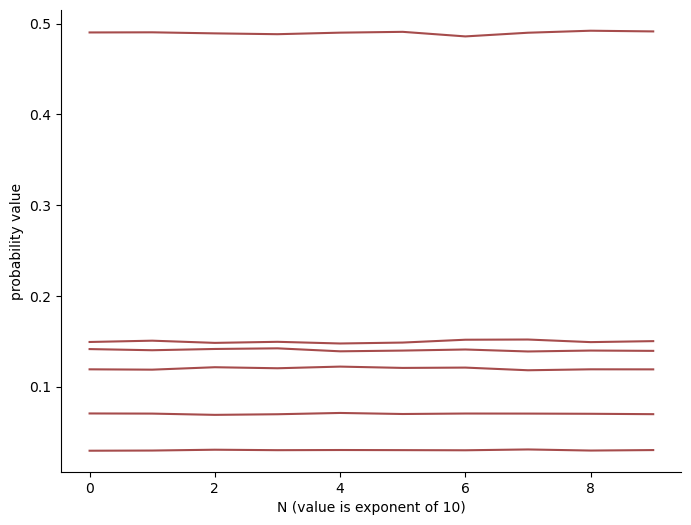

In [74]:
# Create the plot
import matplotlib.pyplot as plt
import seaborn as sns

# x_axis 
# records 

f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(records, color='maroon', alpha=0.7)
sns.despine(ax=ax)
ax.set_xlabel('N (value is exponent of 10)')
ax.set_ylabel('probability value')

plt.show()

We know the more simulations we run, the more accure we will get, but from a rough analyisis, it can be posutulated that an N of ~1000000 will provide approximate probabilities to become almost indistinguishable from the analytic ones as the graph indicates that the values converge at that N.